In [74]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
pd.options.display.max_rows = 5000 #(设定能显示的行数)

###### Here, we list the cities we looking fro jobs in.

In [1]:
cities = 'London'
# "London ,Manchester,Birmingham,Wolverhampton ,Leeds, Bradford ,Glasgow ,Southampton,Portsmouth ,Liverpool ,Newcastle ,Nottingham ,Sheffield,Bristol,Belfast,Leicester"
city_lst = []
for i in cities.split(','):
    city_lst.append(i.strip())
    
print(city_lst)

['London']


##### Here, we are checking requests status. '200' is the good to go reaction.
### *Important*
### put the job title after "jobs?q=" , for example:
url = 'https://www.indeed.co.uk/jobs?q=business+development&l=london&start=0'

url = 'https://www.indeed.co.uk/jobs?q=juior+data+scientist&l=london&start=0'

In [3]:
url = 'https://www.indeed.co.uk/jobs?q=business+development&l=london&start=0'
# url = 'https://www.indeed.co.uk/jobs?q=junior+data+scientist&l=london&start=10' # Every page is 10*x, page3=20 ...
r = requests.get(url)
r.status_code

200

#### Here, we create soup and have a glimpse. Check if we can find the info we want.

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.prettify()[:500])

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="//d3fw5vlhllyvee.cloudfront.net/s/7476d99/en_GB.js" type="text/javascript">
  </script>
  <link href="//d3fw5vlhllyvee.cloudfront.net/s/29590d8/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="https://www.indeed.co.uk/rss?q=business+development&amp;l=london" rel="alternate" title="Business Development Jobs, vacancies in London" type="applicati


In [10]:
container = soup.find_all('span', attrs={'class':'salary no-wrap'})
for contain in container:
    print(contain.text.strip())
    print('*'*30)

£40 an hour
******************************
£31,425 - £35,078 a year
******************************
£30,000 - £40,000 a year
******************************
£40,000 - £45,000 a year
******************************
£22,000 - £24,000 a year
******************************
£21,000 - £23,000 a year
******************************
£35,000 - £45,000 a year
******************************
£30,000 - £50,000 a year
******************************
£70,641 - £80,554 a year
******************************
£40,000 - £65,000 a year
******************************


#### 1.注意这里的 page 变量的使用。
#### 2.整个过程其实可以写成一个function。

##### ？小问题，salary在为空时不会反悔任何内容，这就让title，location，salary之后的排序产生问题

In [21]:
titles = []
companies = []
# locations = []  # sequence doesn't match others
salaries = []
summaries = []
for page in range(0, 1000, 10):
    url = 'https://www.indeed.co.uk/jobs?q=business+development&l=london&start={}'.format(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    for title in soup.find_all('a', attrs={'data-tn-element':'jobTitle'}):
        try:
            titles.append(title.text.strip())
        except:
            titles.append('Nothing')
    for company in soup.find_all('span', attrs={'class':'company'}):
        try:
            companies.append(company.text.strip())
        except:
            companies.append('Nothing')
#     for location in soup.find_all('span', attrs={'class':'location'}):
#         try:
#             locations.append(location.text.strip())
#         except:
#             locations.append('Nothing')
    for salary in soup.find_all('span', attrs={'class':'salary no-wrap'}):
        try:
            salaries.append(salary.text.strip())
        except:
            salaries.append(np.nan)

    for summary in soup.find_all("div",{"class":"summary"}):
        try:
            summaries.append(summary.text.strip())
        except:
            summaries.append('Nothing')

In [22]:
print(len(titles))
print(len(companies))
#print(len(locations))
# print(len(salaries))
print(len(summaries))

1530
1530
1530


In [23]:
S_results = pd.DataFrame({'title':titles, 'company':companies, 'summary':summaries})

In [24]:
S_results

,title,company,summary
0,Business Development Manager,Single B.V.,Follow up business leads and identify new sale...
1,Business Development Manager,This Is Prime,Confidence and ability to engage with C Level ...
2,Marketing and Business Development Coordinator,Royal College of Psychiatrists,You should be a strong written and verbal comm...
3,Business Development Manager,Eye Clinic London,Business development: 1 year (Preferred).\nExc...
4,CHL Business Development Manager - Constructio...,Construction Helpline Ltd,Sales/business development: 3 years (Required)...
5,Business Development Manager,Ad Hoc Property Management Ltd,Strong command of spoken and written English l...
6,Business Development Assistant,Dentsu Aegis Network,"Organise team social events, get togethers alo..."
7,Business Development Administrator,Lee Kum Kee (Europe) Ltd,Possible future progression opportunities with...
8,Sales & Business Development,Pitman Training Group Ltd,Ideally a background in Learning and developme...
9,Business Development Executive,Ai-Media,Business development: 2 years (Required).\nMot...


In [ ]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('PythonExport.xlsx')
yourdf.to_excel(writer,'Sheet5')
writer.save()

# DF TO CSV
yourdf.to_csv('PythonExport.csv', sep=',')

In [79]:
from pandas import ExcelWriter

In [80]:
writer = ExcelWriter('PythonExport.xlsx')
S_results.to_excel(writer,'Sheet5')
writer.save()

salaries = []
for page in range(0, 100, 10):
    url = 'https://www.indeed.co.uk/jobs?q=junior+data+scientist&l=london&start={}'.format(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    for title in soup.find_all("span","salary no-wrap"):
        try:
            salaries.append(title.text.strip())
        except:
            salaries.append('No content')

print(len(salaries))
print(salaries)

需求：把上面的titles和salaries装入一个pandas表格，让title和salary一一对应。

##  To be solved
##### 我现在能理解，在做之前的project中，for job in soup.find_all('div', attrs={'class':'result'}): 这段代码其实是将每次搜索的范围限制在一个工作内容的卡片中。
##### 这样就能自动匹配所有的title,company, salary等等。
##### 而我目前还没有找到方法，将每一次的搜索限定在一个小卡片中。所以，如果有某个信息缺失时，之后的信息可能发生错位。

In [18]:
titles = []
salaries = []
for page in range(0,100,10):
    url = 'https://www.indeed.co.uk/jobs?q=business+development&l=london&start={}'.format(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    for job in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result clickcard'}):
        try:
            titles.append(job.find('a', attrs={'data-tn-element':'jobTitle'}))
        except:
            titles.append(np.nan)
        
        try:
            salaries.append(job.find("span","salary no-wrap"))
        except:
            salaries.append(np.nan)
                

### Here, if salary searching results number is not as many as the others, deal with salary individually here.

In [54]:
print(salaries[:100])
print(len(salaries))
print(type(salaries[0]))

['£40 an hour', '£45,000 - £55,000 a year', '£31,425 - £35,078 a year', '£30,000 - £40,000 a year', '£40,000 - £45,000 a year', '£21,000 - £23,000 a year', '£22,000 - £24,000 a year', '£35,000 - £45,000 a year', '£40,000 - £65,000 a year', '£30,000 - £50,000 a year', '£70,641 - £80,554 a year', '£70,641 - £80,554 a year', '£30,000 - £32,000 a year', '£26,000 - £30,000 a year', '£22,000 a year', '£30,000 - £35,000 a year', '£80,000 a year', '£32,000 - £40,000 a year', '£1,200 - £6,000 a month', '£30,000 - £45,000 a year', '£30,000 a year', '£20,000 - £40,000 a year', '£32,000 a year', '£25,000 a year', '£24,241 a year', '£32,000 - £40,000 a year', '£80,000 a year', '£25,000 - £35,000 a year', '£50,000 - £85,000 a year', '£50,000 - £55,000 a year', '£40,000 - £45,000 a year', '£22,000 - £24,000 a year', '£80,000 a year', '£27,053 a year', '£30,000 - £35,000 a year', '£25,000 - £30,000 a year', '£300 - £500 a week', '£24,241 a year', '£20,000 a year', '£12 - £25 an hour', '£30,000 a year'

In [62]:
a_year=[]
for salary in salaries:
    if 'a year' in salary:
        a_year.append(salary)
print(len(a_year))

745


In [65]:
with_dash = []
no_dash = []
for i in a_year:
    if '-' in i:
        with_dash.append(i)
    else:
        no_dash.append(i)

In [66]:
print(len(with_dash))
print(len(no_dash))
print(with_dash[:10])
print(no_dash[:10])

502
243
['£45,000 - £55,000 a year', '£31,425 - £35,078 a year', '£30,000 - £40,000 a year', '£40,000 - £45,000 a year', '£21,000 - £23,000 a year', '£22,000 - £24,000 a year', '£35,000 - £45,000 a year', '£40,000 - £65,000 a year', '£30,000 - £50,000 a year', '£70,641 - £80,554 a year']
['£22,000 a year', '£80,000 a year', '£30,000 a year', '£32,000 a year', '£25,000 a year', '£24,241 a year', '£80,000 a year', '£80,000 a year', '£27,053 a year', '£24,241 a year']


In [79]:
no_dash[0].replace('£','').replace('a year','').replace(',','').strip()

'22000'

In [67]:
with_dash[0].split('-')[0].replace('£','').replace(',','').strip()

'45000'

In [68]:
with_dash[0].split('-')[1].replace('a year','').replace('£','').replace(',','').strip()

'55000'

In [69]:
lowline = []
highline= []
for i in with_dash:
    lowline.append(i.split('-')[0].replace('£','').replace(',','').strip())
    highline.append(i.split('-')[1].replace('a year','').replace('£','').replace(',','').strip())

    
no_dash = [i.replace('£','').replace('a year','').replace(',','').strip() for i in no_dash]

In [81]:
print(lowline[:5])
print(highline[:5])
print(no_dash[:5])

[45000, 31425, 30000, 40000, 21000]
['55000', '35078', '40000', '45000', '23000']
['22000', '80000', '30000', '32000', '25000']


### Here, turn str into num.

In [89]:
lowline = [int(i) for i in lowline]
highline = [int(i) for i in highline]
no_dash = [int(i) for i in no_dash]

In [90]:
np.mean(lowline+highline)

47750.81772908367

In [91]:
np.median(lowline+highline)

44172.0

In [84]:
np.mean(no_dash)

49134.168724279836

In [87]:
np.median(no_dash)

40000.0

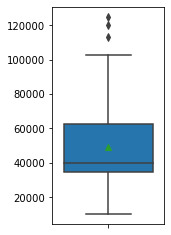

In [97]:
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns
fig,ax=plt.subplots(figsize=(2,4))
sns.boxplot(no_dash, orient='v',showmeans=True,saturation=0.9)
plt.show()

UK Indeed 的一个卡片网页代码：

<div class="jobsearch-SerpJobCard unifiedRow row result clickcard" id="pj_1efee661bdfabb84" data-jk="1efee661bdfabb84" data-empn="5951703298586437" data-ci="360037745">

<style>
.jobcard_logo{margin:6px 0}.jobcard_logo img{width:auto;max-width:80px;max-height:30px}.jasxrefreshcombotst .jobcard_logo img{max-height:2rem;max-width:100%}
</style>


<h2 class="title">
<a target="_blank" id="sja1" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0DM3XBi8UFNat4xrxKgt90CEA066Pp5zFAvDf-Fs8XmhJTcjHQ7jMqRdWNtbENZjRV9WkydgHWncJ5CoKqvzrslhe_llTJCuEu79pRBDEJ4m1jsjHw76W9m9xg5hQuJMNFHsVES5HdHxCkjFqEykpykvnzeIDVL5kil_CuUinBOX7EBEu3yLVLqi6YKeIdBSsGXGQkZNvjLbVzF0_4iZnCoeNH8yt3hl1-JiQK6XiCk49dMbGhmcB0N8BBvfjbUeNoM4cWkfsfIZZbi-EVkyJ3UfvNfli3sOQGpTTmIVteZKQwVOvsC2n7TdrbmvGVo8CM01xfgEQ86cdYo51SKQdYE8fs5aXUxHfKiwFpi8O2a-i9kmZRwkr6JVjpXW4V5IeJR5DerbNICc6nzMmoRx49D771bqtI_Z2-LBI99mnlwUCA3CavgOZvTt1NlEEBAafC8w8YMrcPODkwtnoTjoI5KraXXoWN6ZDuUnx4tt_AJrCNZOsJlBaIFVihdYLBOYLrenw-t9DSH-A==&amp;p=1&amp;fvj=1&amp;vjs=3" onmousedown="sjomd('sja1'); clk('sja1'); rclk(this,jobmap[1],1);" onclick="setRefineByCookie([]); sjoc('sja1', 1); convCtr('SJ'); rclk(this,jobmap[1],true,1);" rel="noopener nofollow" title="Head of Medical Statistics / Principal Medical Statistician" class="jobtitle turnstileLink " data-tn-element="jobTitle">
Head of Medical Statistics / Principal Medical Statistician</a>

</h2>

<div class="sjcl">
<div>
<span class="company">
PHMR Ltd</span>

</div>
<div id="recJobLoc_1efee661bdfabb84" class="recJobLoc" data-rc-loc="London" style="display: none"></div>
<div class="location accessible-contrast-color-location">London NW1 8XY</div>
</div>

<div class="salarySnippet salarySnippetDemphasizeholisticSalary">
<span class="salary no-wrap">
<span class="salaryText">
£53,150 - £76,017 a year</span>
</span>
</div>
<div class="jobCardReqContainer"><div class="jobCardReqHeader">Requirements</div><div class="jobCardReqList"><div class="jobCardReqItem">Medical statistics to support HTA/HEOR activities: 5 years</div></div></div><table class="jobCardShelfContainer" role="presentation"><tbody><tr class="jobCardShelf"><td class="jobCardShelfItem indeedApply"><span class="jobCardShelfIcon"><svg width="16" height="16" viewBox="0 0 20 20" fill="none"><rect width="20" height="20" rx="10" fill="#FF5A1F"></rect><path fill-rule="evenodd" clip-rule="evenodd" d="M15.3125 4.0625L10.8125 15.3125L7.99999 11.375L15.3125 4.0625ZM7.604 12.7576L6.875 15.3125L8.567 14.1054L7.604 12.7576ZM7.20463 10.5796L12.419 5.36525L4.0625 9.125L6.9875 10.7968L7.20463 10.5796Z" fill="white"></path></svg></span><span class="iaLabel iaIconActive">Apply with your Indeed CV</span></td></tr></tbody></table><div class="summary">
<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> 
 <li style="margin-bottom:0px;">Fluency in English (for writing papers, reports, proposals, giving presentations and mentoring <b>junior</b> staff);</li>
 <li>Good time management and organisational skills.</li>
</ul></div>
<div class="jobsearch-SerpJobCard-footer">
<div class="jobsearch-SerpJobCard-footerActions">

<div class="result-link-bar-container">
<div class="result-link-bar"><span class="date ">8 days ago</span><span id="tt_set_1" class="tt_set"><div class="job-reaction"><button class="job-reaction-kebab" aria-haspopup="true" aria-expanded="false" data-ol-has-click-handler="" tabindex="0" aria-label="save or dislike" onclick="toggleKebabMenu('1efee661bdfabb84', true, event); return false;"></button><span class="job-reaction-kebab-menu"><button class="job-reaction-kebab-item job-reaction-save" onclick="changeJobState('1efee661bdfabb84', 'save', 'linkbar', true, '');return false;" data-ol-has-click-handler=""><svg focusable="false" viewBox="0 0 24 24" height="16" width="16"><g><path fill="#2d2d2d" d="M16.5,3A6,6,0,0,0,12,5.09,6,6,0,0,0,7.5,3,5.45,5.45,0,0,0,2,8.5C2,12.28,5.4,15.36,10.55,20L12,21.35,13.45,20C18.6,15.36,22,12.28,22,8.5A5.45,5.45,0,0,0,16.5,3ZM12.1,18.55l-0.1.1-0.1-.1C7.14,14.24,4,11.39,4,8.5A3.42,3.42,0,0,1,7.5,5a3.91,3.91,0,0,1,3.57,2.36h1.87A3.88,3.88,0,0,1,16.5,5,3.42,3.42,0,0,1,20,8.5C20,11.39,16.86,14.24,12.1,18.55Z"></path></g></svg><span class="job-reaction-kebab-item-text">Save job</span></button><button class="job-reaction-kebab-item job-reaction-dislike" onclick="dislikeJob(false, false, '1efee661bdfabb84', 'unsave', 'linkbar', true, '');" data-ol-has-click-handler=""><span class="job-reaction-dislike-icon"></span><span class="job-reaction-kebab-item-text">Not interested</span></button><button class="job-reaction-kebab-item job-reaction-report" onclick="reportJob('1efee661bdfabb84');"><span class="job-reaction-report-icon"></span><span class="job-reaction-kebab-item-text">Report job</span></button></span></div></span><div id="editsaved2_1efee661bdfabb84" class="edit_note_content" style="display:none;"></div><script>if (!window['sj_result_1efee661bdfabb84']) {window['sj_result_1efee661bdfabb84'] = {};}window['sj_result_1efee661bdfabb84']['showSource'] = false; window['sj_result_1efee661bdfabb84']['source'] = "Indeed"; window['sj_result_1efee661bdfabb84']['loggedIn'] = true; window['sj_result_1efee661bdfabb84']['showMyJobsLinks'] = true;window['sj_result_1efee661bdfabb84']['undoAction'] = "unsave";window['sj_result_1efee661bdfabb84']['relativeJobAge'] = "8 days ago";window['sj_result_1efee661bdfabb84']['jobKey'] = "1efee661bdfabb84"; window['sj_result_1efee661bdfabb84']['myIndeedAvailable'] = true; window['sj_result_1efee661bdfabb84']['showMoreActionsLink'] = window['sj_result_1efee661bdfabb84']['showMoreActionsLink'] || false; window['sj_result_1efee661bdfabb84']['resultNumber'] = 1; window['sj_result_1efee661bdfabb84']['jobStateChangedToSaved'] = false; window['sj_result_1efee661bdfabb84']['searchState'] = "q=junior data scientist&amp;l=london&amp;start=40"; window['sj_result_1efee661bdfabb84']['basicPermaLink'] = "https://www.indeed.co.uk"; window['sj_result_1efee661bdfabb84']['saveJobFailed'] = false; window['sj_result_1efee661bdfabb84']['removeJobFailed'] = false; window['sj_result_1efee661bdfabb84']['requestPending'] = false; window['sj_result_1efee661bdfabb84']['notesEnabled'] = false; window['sj_result_1efee661bdfabb84']['currentPage'] = "serp"; window['sj_result_1efee661bdfabb84']['sponsored'] = true;window['sj_result_1efee661bdfabb84']['reportJobButtonEnabled'] = false; window['sj_result_1efee661bdfabb84']['showMyJobsHired'] = false; window['sj_result_1efee661bdfabb84']['showSaveForSponsored'] = true; window['sj_result_1efee661bdfabb84']['showJobAge'] = true; window['sj_result_1efee661bdfabb84']['showHolisticCard'] = true; window['sj_result_1efee661bdfabb84']['showDislike'] = true; window['sj_result_1efee661bdfabb84']['showKebab'] = true; window['sj_result_1efee661bdfabb84']['showReport'] = true;</script></div></div>
</div>
</div>


<div class="tab-container">
<div class="sign-in-container result-tab"></div>
<div class="tellafriend-container result-tab email_job_content"></div>
</div>
</div>

In [20]:
# results = pd.DataFrame({'title':titles, 'salary':salaries})
# results

In [ ]:
# continue tomorrow

In [ ]:
#sdfasdf

### companies, salaries, locations, job descriptions

In [8]:
# bs = soup.find_all('span', attrs={'class':'company'})
# for title in bs:
#     print(title.text.strip())

In [9]:
# money = []
# bs = soup.find_all("span","salary no-wrap")
# for title in bs:
#     if len(title.text) >3  :
#         money.append(title.text.strip())
#     else:
#         money.append('0')

In [10]:
# bs = soup.find_all('span', attrs={'class':'location'})
# for title in bs:
#     print(title.text.strip())

In [11]:
# bs = soup.find_all("div",{"class":"summary"})
# for title in bs:
#     print(title.text.strip())